# UFO SIGHTINGS DATA ANALYSIS

* Import pandas and numpy to pull data
* Use matplotlib for plotting
* Use seaborn to help with visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pathlib

* Requirement 1 = Loading two data sources 

In [9]:
import pandas as pd

UFODATA = pd.read_csv('ufo_sightings.csv')


# Requirement 2 = Clean and operate on the data while combining them.
  * I am going to look at the datasets by looking at shape, info, describing, 
  and the head. 

In [10]:
UFODATA.head()

,Location.City,Location.State,Location.Country,Data.Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25


In [21]:
UFODATA.shape

(60632, 16)

In [11]:
UFODATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60632 entries, 0 to 60631
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Location.City                    60632 non-null  object 
 1   Location.State                   60632 non-null  object 
 2   Location.Country                 60632 non-null  object 
 3   Data.Shape                       60632 non-null  object 
 4   Data.Encounter duration          60632 non-null  float64
 5   Data.Description excerpt         60632 non-null  object 
 6   Location.Coordinates.Latitude    60632 non-null  float64
 7   Location.Coordinates.Longitude   60632 non-null  float64
 8   Dates.Sighted.Year               60632 non-null  int64  
 9   Dates.Sighted.Month              60632 non-null  int64  
 10  Date.Sighted.Day                 60632 non-null  int64  
 11  Dates.Sighted.Hour               60632 non-null  int64  
 12  Dates.Sighted.Minu

In [12]:
UFODATA.describe()

,Data.Encounter duration,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
count,6.063200e+04,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000
mean,5.410128e+03,38.311073,-95.584796,2004.447833,6.872658,15.026587,15.809094,17.718367,2007.401537,6.706063,15.229219
std,4.143867e+05,5.552705,18.025296,10.178389,3.249002,8.920703,7.537834,17.924455,4.480640,3.487636,8.789173
min,1.000000e-02,19.426944,-170.478889,1910.000000,1.000000,1.000000,0.000000,0.000000,1998.000000,1.000000,1.000000
25%,3.000000e+01,34.092222,-114.336667,2002.000000,4.000000,7.000000,11.000000,0.000000,2004.000000,4.000000,8.000000
50%,1.800000e+02,38.904306,-89.911111,2007.000000,7.000000,15.000000,19.000000,15.000000,2008.000000,7.000000,14.000000
75%,6.000000e+02,41.924583,-81.035000,2011.000000,10.000000,22.000000,21.000000,30.000000,2012.000000,10.000000,22.000000
max,6.627600e+07,70.636944,-66.984722,2014.000000,12.000000,31.000000,23.000000,59.000000,2014.000000,12.000000,31.000000


In [15]:


fixed_columns = {
    'Location.City':'City','Location.State':'State', 'Location.Country': 'Country','Data.Shape':'Shape',
    'Location.Coordinates.Latitude':'Latitude',
    'Location.Coordinates.Longitude':'Longitude',
    'Dates.Sighted.Year':'Year',
    'Dates.Sighted.Month':'Month', 'Date.Sighted.Day' : 'Day','Dates.Sighted.Hour': 'Hour',
    'Dates.Sighted.Minute': 'Minute'
}

UFODATA.rename(columns=fixed_columns,inplace=True)
UFODATA.columns
     


Index(['City', 'State', 'Country', 'Shape', 'Data.Encounter duration',
       'Data.Description excerpt', 'Location.Coordinates.Latitude ',
       'Location.Coordinates.Longitude ', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Dates.Documented.Year', 'Dates.Documented.Month',
       'Dates.Documented.Day'],
      dtype='object')

In [16]:
UFODATA.head(10)

,City,State,Country,Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Year,Month,Day,Hour,Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25
5,anchorage,AK,US,circle,4.0,Large&#44 bright&#44 blue/white circular objec...,61.218056,-149.900278,1972,8,30,1,30,2004,1,17
6,anchorage,AK,US,circle,7200.0,Multiple craft sighted above a Anchorage&#44 Ak,61.218056,-149.900278,2006,10,23,21,0,2006,10,30
7,anchorage,AK,US,circle,900.0,Approx. 12 orange orbs moving across the sky f...,61.218056,-149.900278,2013,10,23,20,0,2013,11,11
8,anchorage,AK,US,circle,10.0,It was gray and did not move or have any light...,61.218056,-149.900278,1998,10,31,10,0,2004,3,2
9,anchorage,AK,US,circle,10.0,At least 40 round red orbs hovering in formati...,61.218056,-149.900278,2013,12,23,22,22,2014,1,10


In [17]:
UFODATA.State.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [18]:
UFODATA[UFODATA.State.str.contains('null')].head()

,City,State,Country,Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Year,Month,Day,Hour,Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day


In [19]:
UFODATA.dropna()

,City,State,Country,Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Year,Month,Day,Hour,Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60627,sheridan,WY,US,oval,20.0,blue-green bright oval was spotted 20 miles so...,44.797222,-106.955556,2002,9,6,21,0,2002,9,13
60628,thermopolis,WY,US,unknown,15.0,UFO near Thermopolis WY,43.646111,-108.211389,2007,6,14,23,0,2007,8,7
60629,torrington,WY,US,cigar,2.0,I was on a hill enjoying the sunset. I fell as...,42.065000,-104.181111,2011,11,5,21,30,2011,12,12
60630,worland,WY,US,light,15.0,The object was a dim point of light that grew ...,44.016944,-107.954722,2003,6,17,22,42,2003,6,18


# Requirement 3 Creating Visualizations
  * Make 3 matplotlib or seaborn (or another plotting library) visualizations to display your data.

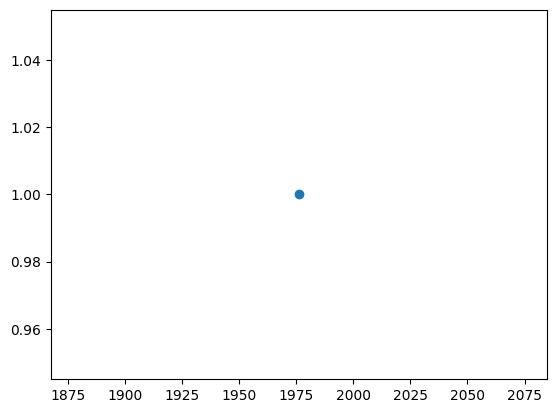

In [77]:
# Group by year and calculate the sum
yearly_totals = jointed_data.groupy(joined)
